# Wine Quality

In [2]:
# Imports libraries/ect..
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from scikeras.wrappers import KerasClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

sns.set_theme()
%matplotlib inline

In [3]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.shape

(1143, 13)

In [5]:
# Drops unneeded ID column
df = df.drop(['Id'], axis=1)

In [6]:
# finds na values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# looks for duplicates
df.duplicated().sum()

125

In [8]:
# drops duplicates
df = df.drop_duplicates()

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Outlier Detection

C:\Users\U360269\AppData\Local\Temp\ipykernel_20288\2494546006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], ax=ax[index,0],color='blue')
C:\Users\U360269\AppData\Local\Temp\ipykernel_20288\2494546006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], ax=ax[index,0],color='b

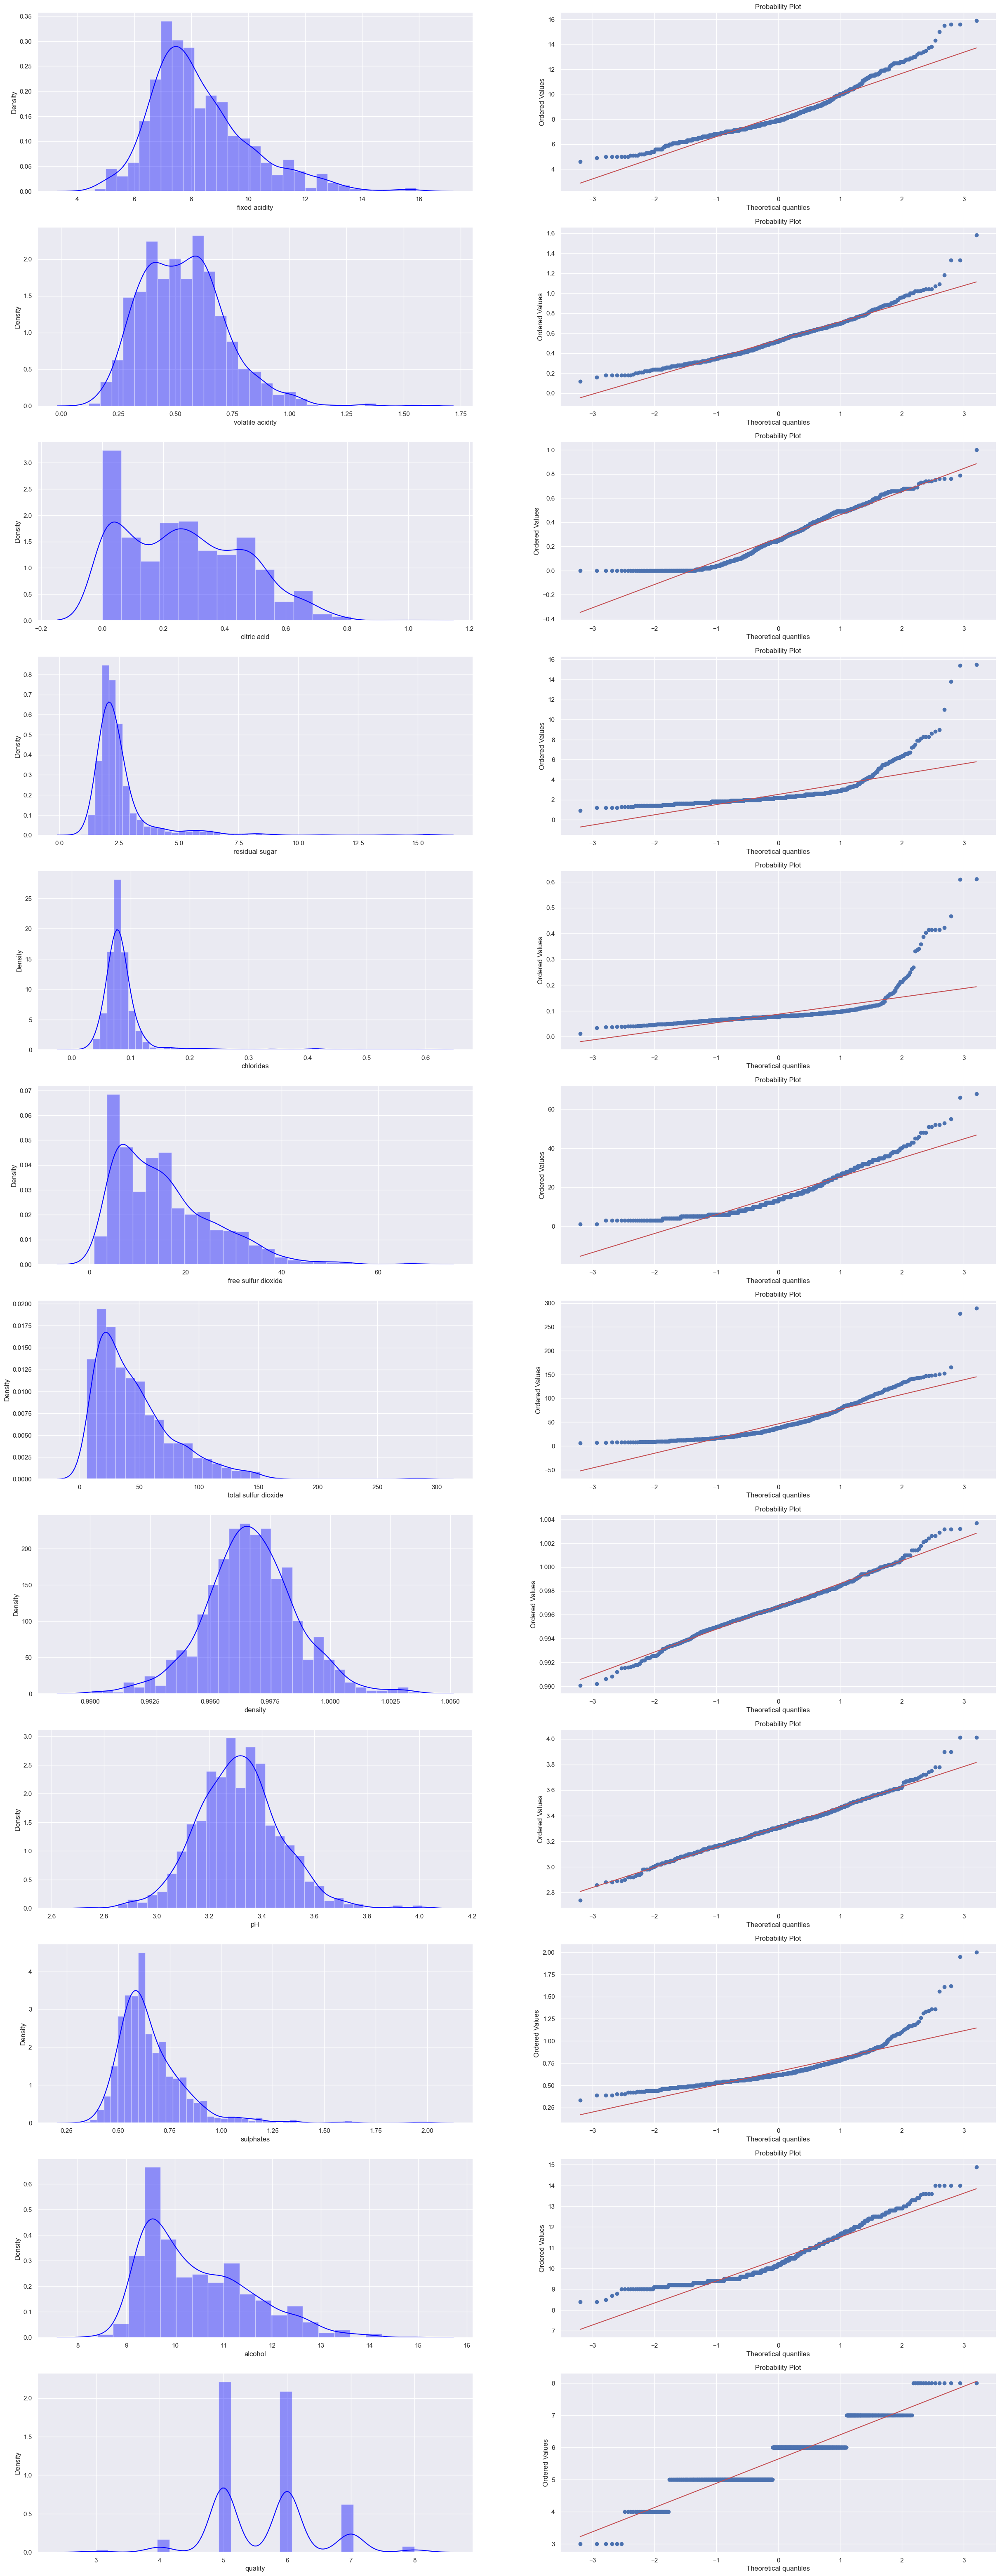

In [10]:
fig, ax = plt.subplots(12,2, figsize=(30,80))
for index, i in enumerate(df.columns):
    sns.distplot(df[i], ax=ax[index,0],color='blue')
    stats.probplot(df[i], plot=ax[index,1])

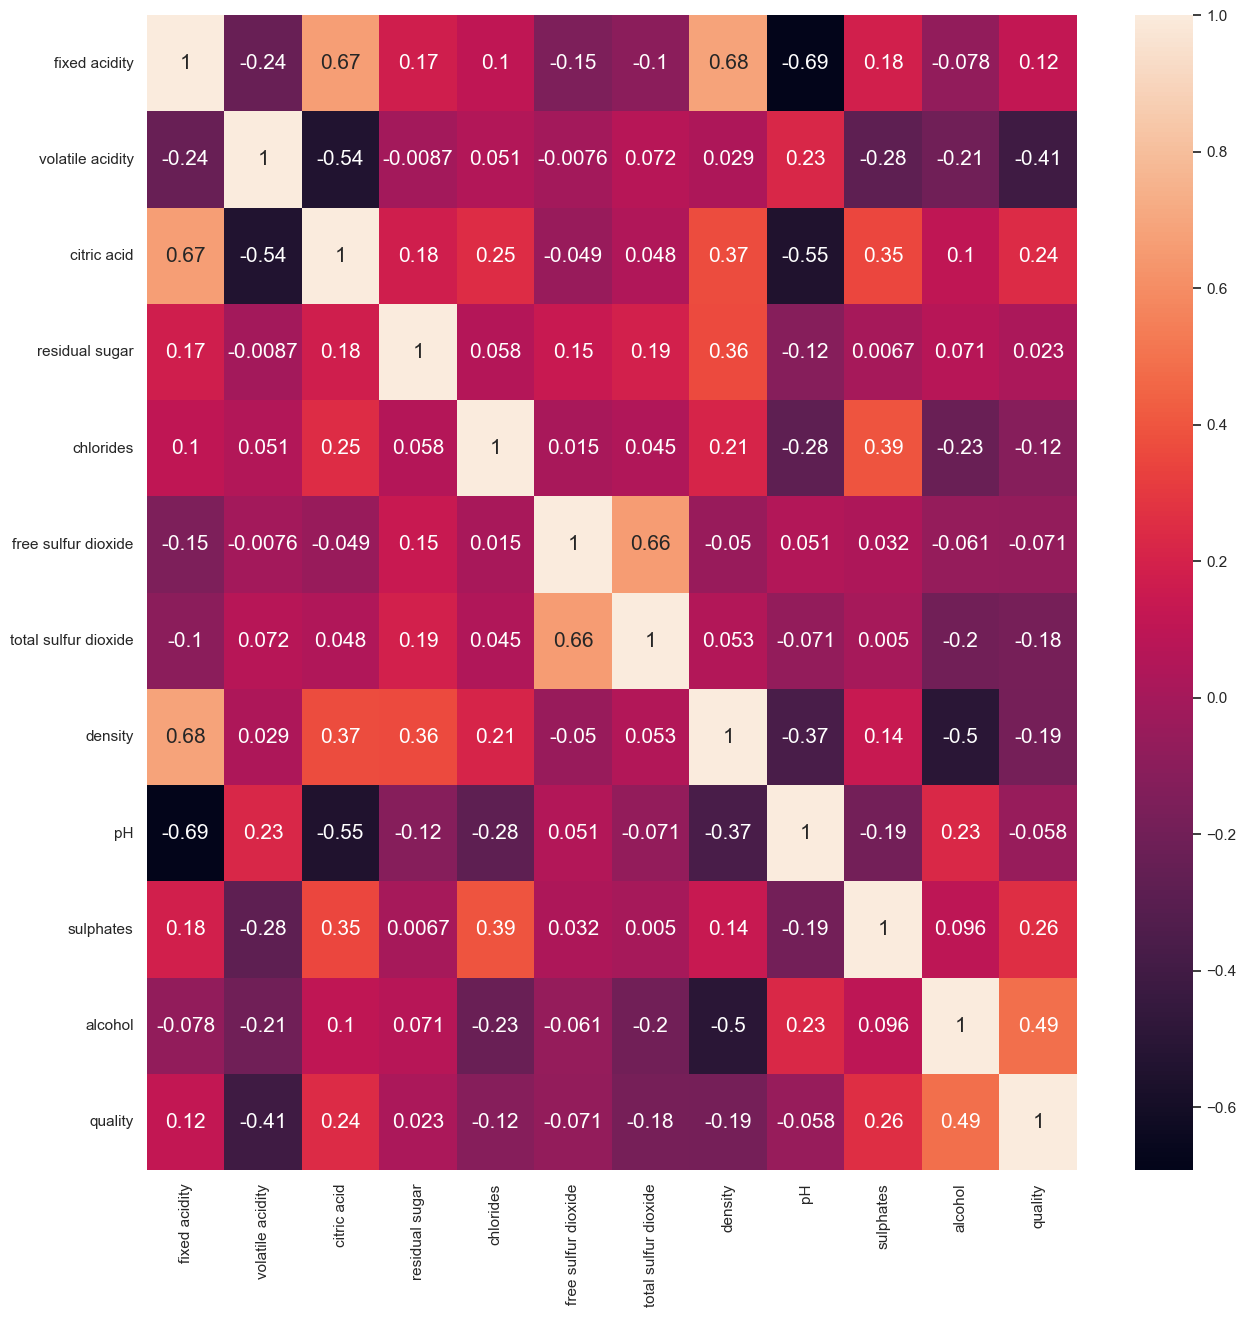

In [11]:
# Correlation of features
mat = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(mat, annot = True, annot_kws={'size': 15});

<Axes: >

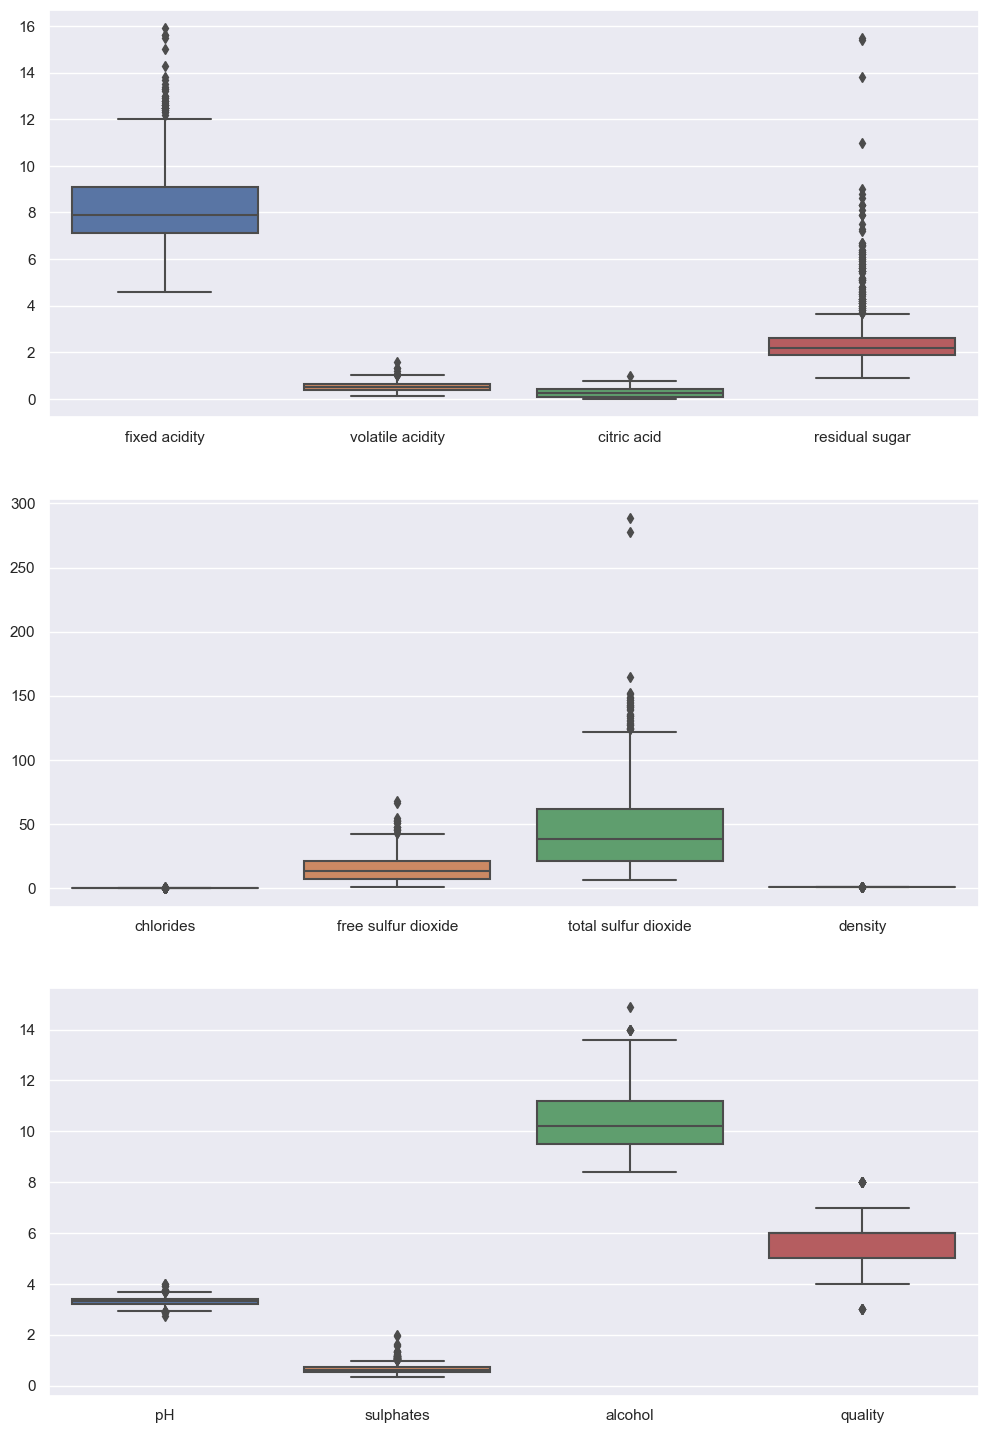

In [12]:
# Box plots for outliers
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(data=df[df.columns[0:4]], ax=ax[0])
sns.boxplot(data=df[df.columns[4:8]], ax=ax[1])
sns.boxplot(data=df[df.columns[8:]])

In [13]:
# Finds outliers based on z_score then removes them
def outlier_dect(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[(z_scores < 3)]
    print(column, " = ", len(np.where(z_scores>3)[0]), 'outliers')
    return df

# Run for columns
for column in df.columns:
    df = outlier_dect(df, column)

fixed acidity  =  8 outliers
volatile acidity  =  5 outliers
citric acid  =  1 outliers
residual sugar  =  20 outliers
chlorides  =  19 outliers
free sulfur dioxide  =  10 outliers
total sulfur dioxide  =  15 outliers
density  =  7 outliers
pH  =  6 outliers
sulphates  =  14 outliers
alcohol  =  4 outliers
quality  =  5 outliers


<Axes: >

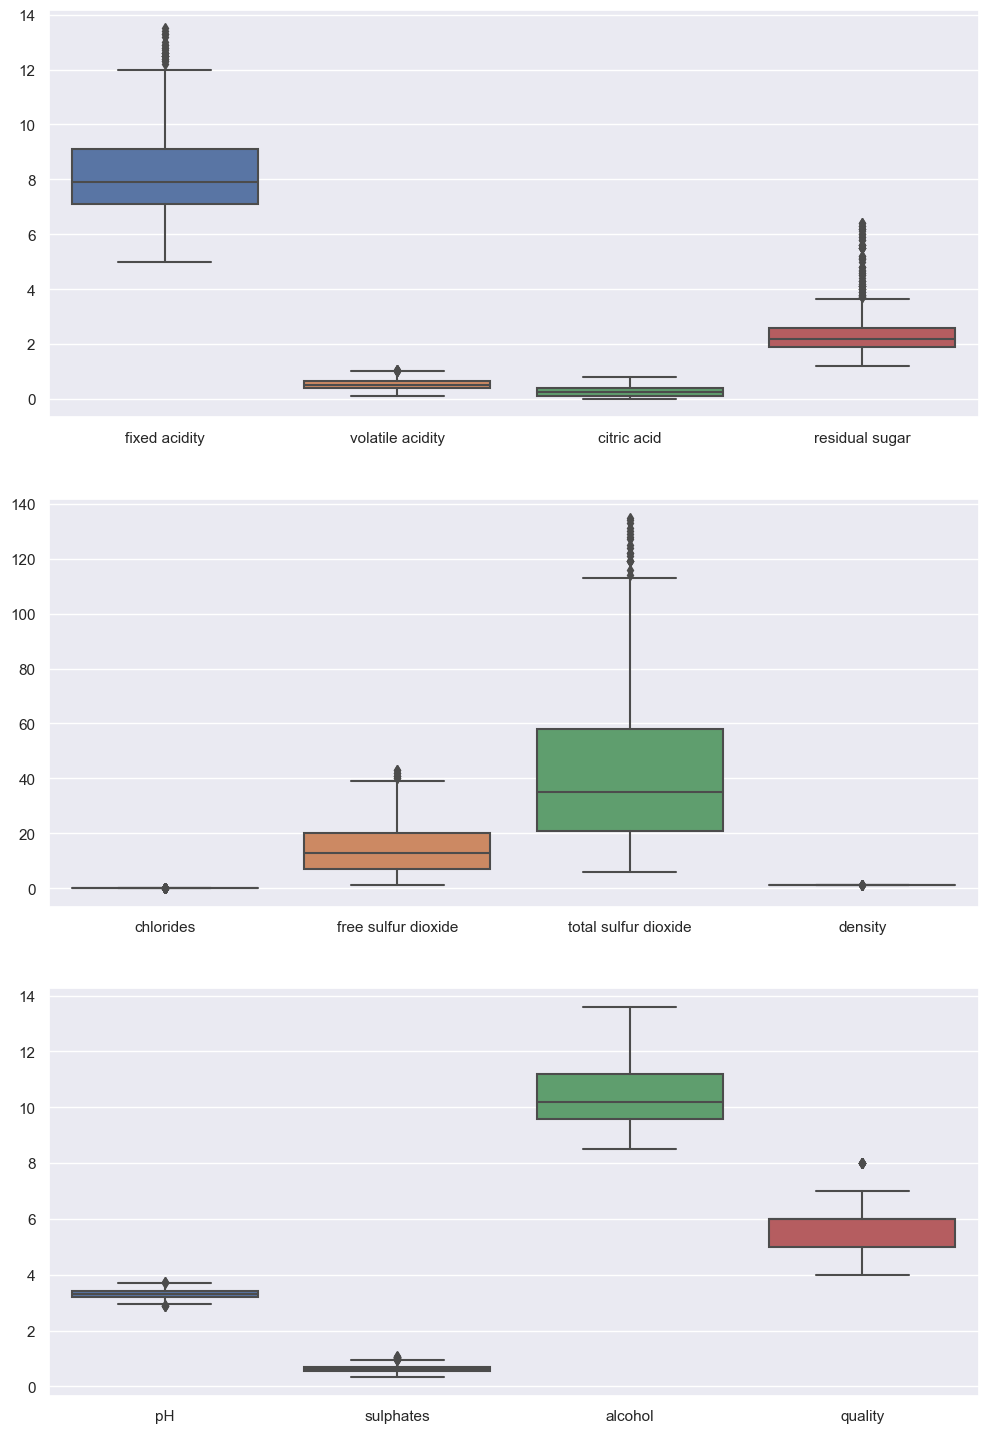

In [14]:
# Box plots for after outliers detection
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(data=df[df.columns[0:4]], ax=ax[0])
sns.boxplot(data=df[df.columns[4:8]], ax=ax[1])
sns.boxplot(data=df[df.columns[8:]])

### Data Prepping and Models

In [15]:
# Assigns data to X and y
X = df.drop(['quality'], axis=1)
y = df['quality']

In [16]:
# Splits data test shape
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

X_train.sample(7)

(723, 11)
(723,)
(181, 11)
(181,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
192,11.5,0.18,0.51,4.00,0.104,4.0,23.0,0.99960,3.28,0.97,10.1
835,9.8,0.39,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4
465,9.7,0.55,0.17,2.90,0.087,20.0,53.0,1.00040,3.14,0.61,9.4
62,7.0,0.62,0.08,1.80,0.076,8.0,24.0,0.99780,3.48,0.53,9.0
964,7.3,0.43,0.24,2.50,0.078,27.0,67.0,0.99648,3.60,0.59,11.1
708,8.9,0.28,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3
205,7.5,0.40,0.12,3.00,0.092,29.0,53.0,0.99670,3.37,0.70,10.3


### Non-Normalized Data Models  

In [17]:
# Keras Neural Network Model
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(11,)))
    model.add(tf.keras.layers.Dense(128))
    model.add(Activation('relu'))
    model.add(tf.keras.layers.Dense(64))
    model.add(Activation('relu'))
    model.add(tf.keras.layers.Dense(32))
    model.add(Activation('relu'))
    model.add(tf.keras.layers.Dense(6))
    model.add(Activation('relu'))
    model.add(tf.keras.layers.Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [18]:
# Using a function to train models, this can be repurposed for Normailized data

def train_models(X_train, y_train, X_val, y_val, print_acc=False):

    dict_acc = {}

    # Label Encoder: this will allow XGBoost to preform as y_train/y_val will start from 0
    # previous error: ValueError: Invalid classes inferred from unique values of `y`. Expected: [0 1 2 3 4], got [4 5 6 7 8] (XGB model)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_val = le.fit_transform(y_val)


    # Dummy classifier to test if models can make good fit
    dum = DummyClassifier(strategy='prior')

    scores = cross_val_score(dum, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_dum_train = scores.mean()
    dum.fit(X_train, y_train)
    acc_dum_val = dum.score(X_val, y_val)

    dict_acc['Dummy Classifier'] = [acc_dum_train, acc_dum_val]

    # Bernoulli Naive Bayes
    bern = BernoulliNB()

    scores = cross_val_score(bern, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_bern_train = scores.mean()
    bern.fit(X_train, y_train)
    acc_bern_val = bern.score(X_val, y_val)

    dict_acc['Bernoulli NB'] = [acc_bern_train, acc_bern_val]

    # Decision Tree
    dtree = DecisionTreeClassifier()

    scores = cross_val_score(dtree, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_dtree_train = scores.mean()
    dtree.fit(X_train, y_train)
    acc_dtree_val = dtree.score(X_val, y_val)

    dict_acc['Decision Tree'] = [acc_dtree_train, acc_dtree_val]

    #Ridge Classifer
    rclass = RidgeClassifier()

    scores = cross_val_score(rclass, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_rclass_train = scores.mean()
    rclass.fit(X_train, y_train)
    acc_rclass_val = rclass.score(X_val, y_val)

    dict_acc['Ridge Classifier'] = [acc_rclass_train, acc_rclass_val]

    #Logistic Regression
    lr = LogisticRegression()

    scores = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_lr_train = scores.mean()
    lr.fit(X_train, y_train)
    acc_lr_val = lr.score(X_val, y_val)

    dict_acc['Logistic Regression'] = [acc_lr_train, acc_lr_val]

    # SGD Classifier
    sgd = SGDClassifier()

    scores = cross_val_score(sgd, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_sgd_train = scores.mean()
    sgd.fit(X_train, y_train)
    acc_sgd_val = sgd.score(X_val, y_val)

    dict_acc['SGD Classifier'] = [acc_sgd_train, acc_sgd_val]

    #KNeighborsClassifier
    knn = KNeighborsClassifier()

    scores = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_knn_train = scores.mean()
    knn.fit(X_train, y_train)
    acc_knn_val = knn.score(X_val, y_val)

    dict_acc['KNeighbors Classifier'] = [acc_knn_train, acc_knn_val]

    #Support Vector Classifier (SVC)
    svc = SVC()

    scores = cross_val_score(svc, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_svc_train = scores.mean()
    svc.fit(X_train, y_train)
    acc_svc_val = svc.score(X_val, y_val)

    dict_acc['SVC'] = [acc_svc_train, acc_svc_val]

    #Random Forest Classifier
    rf = RandomForestClassifier()

    scores = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_rf_train = scores.mean()
    rf.fit(X_train, y_train)
    acc_rf_val = rf.score(X_val, y_val)

    dict_acc['Random Forest Classifier'] = [acc_rf_train, acc_rf_val]

    #XGBClassifier
    xgb = XGBClassifier()

    scores = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_xgb_train = scores.mean()
    xgb.fit(X_train, y_train)
    acc_xgb_val = xgb.score(X_val, y_val)

    dict_acc['XGBoost Classifier'] = [acc_xgb_train, acc_xgb_val]

    #Neural Network
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=3)
    model_keras = KerasClassifier(build_fn=create_model, epochs=100, batch_size=50, callbacks=callback, verbose=0)

    scores = cross_val_score(model_keras, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_model_keras_train = scores.mean()
    model_keras.fit(X_train, y_train)
    acc_keras = model_keras.score(X_val, y_val)

    dict_acc['Neural Network'] = [acc_model_keras_train, acc_keras]

    # Printing the values
    if print_acc:
        for key, values in dict_acc.items():
            print("{} Accuracy on Training Data (CV): {}".format(key, values[0]))
            print("{} Accuracy on Validation Data: {}".format(key, values[1]))
            print()
    
    return dict_acc

In [19]:
dict_models = train_models(X_train, y_train, X_val, y_val, print_acc=True)

c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


Dummy Classifier Accuracy on Training Data (CV): 0.42185823754789276
Dummy Classifier Accuracy on Validation Data: 0.43646408839779005

Bernoulli NB Accuracy on Training Data (CV): 0.42185823754789276
Bernoulli NB Accuracy on Validation Data: 0.43646408839779005

Decision Tree Accuracy on Training Data (CV): 0.4770689655172413
Decision Tree Accuracy on Validation Data: 0.5193370165745856

Ridge Classifier Accuracy on Training Data (CV): 0.555948275862069
Ridge Classifier Accuracy on Validation Data: 0.6187845303867403

Logistic Regression Accuracy on Training Data (CV): 0.5794636015325672
Logistic Regression Accuracy on Validation Data: 0.6132596685082873

SGD Classifier Accuracy on Training Data (CV): 0.48134099616858234
SGD Classifier Accuracy on Validation Data: 0.43646408839779005

KNeighbors Classifier Accuracy on Training Data (CV): 0.4495210727969349
KNeighbors Classifier Accuracy on Validation Data: 0.48066298342541436

SVC Accuracy on Training Data (CV): 0.48680076628352487
SV

In [20]:

df_acc = pd.DataFrame.from_dict(dict_models)
df_acc = df_acc.transpose()
df_acc.columns = ['Acc Training (CV)', 'Acc Validation']
df_acc

,Acc Training (CV),Acc Validation
Dummy Classifier,0.421858,0.436464
Bernoulli NB,0.421858,0.436464
Decision Tree,0.477069,0.519337
Ridge Classifier,0.555948,0.618785
Logistic Regression,0.579464,0.613260
SGD Classifier,0.481341,0.436464
KNeighbors Classifier,0.449521,0.480663
SVC,0.486801,0.497238
Random Forest Classifier,0.591897,0.629834
XGBoost Classifier,0.571111,0.602210


### Plotting Data

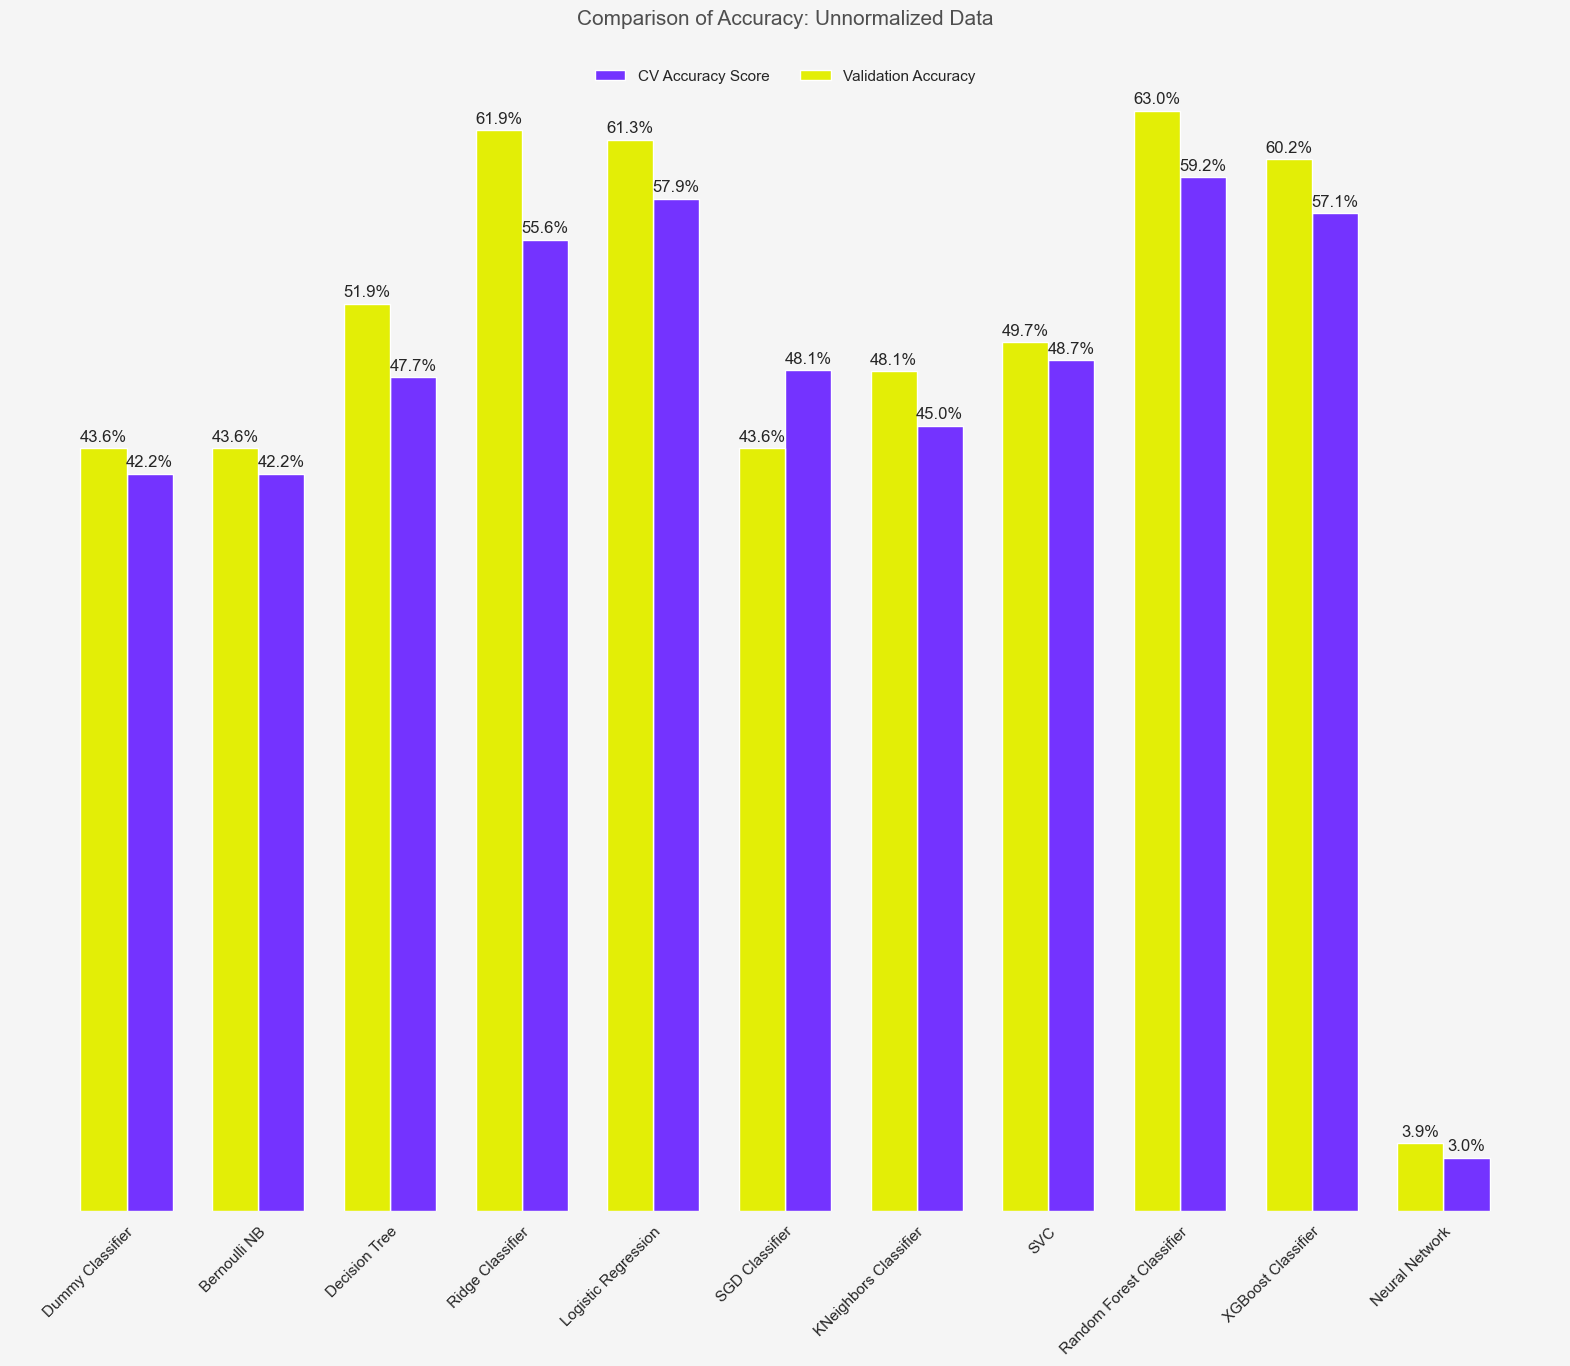

In [21]:
fig = plt.figure(figsize=(20,15)) # Plot size
fig.patch.set_facecolor('whitesmoke') # Plot background cover

ax = plt.gca()
width = 0.35

train = ax.bar(df_acc.index, df_acc['Acc Training (CV)'], width,align='edge', color = '#7433FF', label='CV Accuracy Score')
val = ax.bar(df_acc.index, df_acc['Acc Validation'], -width, align='edge', color = '#E3EE06', label='Validation Accuracy')

for r1, r2 in zip(train.patches, val.patches):
    h1 = r1.get_height()
    h2 = r2.get_height()

    percent1 = h1*100
    percent2 = h2*100

    ax.annotate('{:.1f}%'.format(percent1),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('{:.1f}%'.format(percent2),
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
# Rotate the X labels (models' names)

plt.box(False)  # disable the box around the plot
ax.grid(False)  # disable the grid
ax.set_yticks([])   # disable the y ticks
plt.xticks(rotation=45, rotation_mode="anchor", ha='right')

# creating a title
plt.title('Comparison of Accuracy: Unnormalized Data', size=15, alpha=0.8, y=1.02)

# add the legend (to display the horizontal lines' labels)
plt.legend(frameon=False, loc='upper center', ncol=2)

# saves the plot
plt.savefig("accuracy-unnormalized.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();


In [22]:
# Normalized data
scaler = StandardScaler()

df_norm = df.copy()
df_norm.iloc[:,0:-1] = scaler.fit_transform(df.iloc[:,0:-1].to_numpy())

y_norm = df_norm['quality']
X_norm = df_norm.drop('quality', axis=1)

(X_train_norm, X_val_norm, y_train_norm, y_val_norm) = train_test_split(X_norm, y_norm, test_size = 0.2, random_state=0)

print('Normalized datasets')
print('Train', X_train_norm.shape)
print('Validation', X_val_norm.shape)

Normalized datasets
Train (723, 11)
Validation (181, 11)


In [23]:
dict_models_norm = train_models(X_train_norm, y_train_norm, X_val_norm, y_val_norm)

df_acc_norm = pd.DataFrame.from_dict(dict_models_norm)
df_acc_norm = df_acc_norm.transpose()
df_acc_norm.columns = ['Acc Training (CV)', 'Acc Validation']
df_acc_norm

c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\U360269\AppData\Local\miniconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: I

,Acc Training (CV),Acc Validation
Dummy Classifier,0.423238,0.430939
Bernoulli NB,0.551925,0.602210
Decision Tree,0.495153,0.546961
Ridge Classifier,0.582395,0.613260
Logistic Regression,0.600307,0.635359
SGD Classifier,0.517337,0.480663
KNeighbors Classifier,0.558755,0.541436
SVC,0.603084,0.629834
Random Forest Classifier,0.589272,0.607735
XGBoost Classifier,0.575421,0.530387


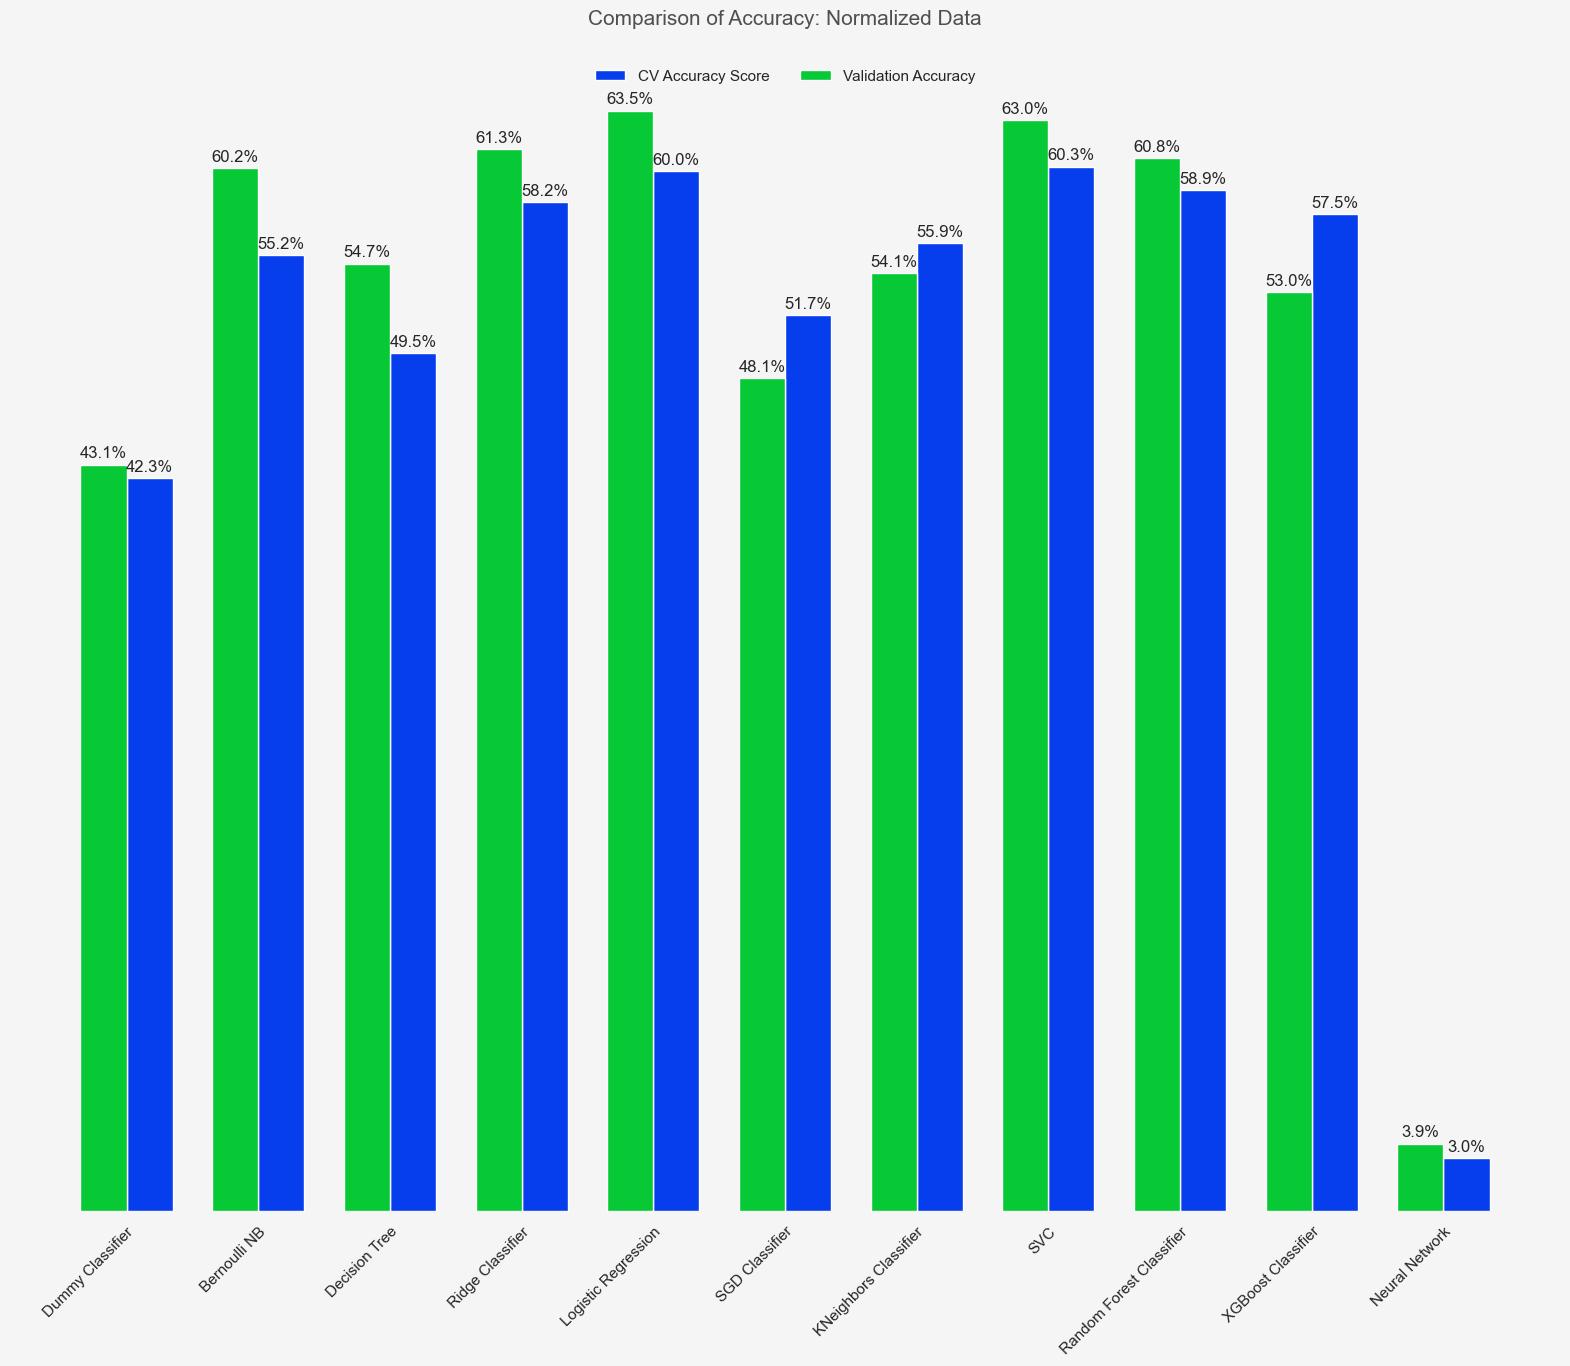

In [24]:
fig = plt.figure(figsize=(20,15)) # Plot size
fig.patch.set_facecolor('whitesmoke') # Plot background cover

ax = plt.gca()
width = 0.35

train = ax.bar(df_acc_norm.index, df_acc_norm['Acc Training (CV)'], width,align='edge', color = '#063EEE', label='CV Accuracy Score')
val = ax.bar(df_acc_norm.index, df_acc_norm['Acc Validation'], -width, align='edge', color = '#06C935', label='Validation Accuracy')

for r1, r2 in zip(train.patches, val.patches):
    h1 = r1.get_height()
    h2 = r2.get_height()

    percent1 = h1*100
    percent2 = h2*100

    ax.annotate('{:.1f}%'.format(percent1),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('{:.1f}%'.format(percent2),
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
# Rotate the X labels (models' names)

plt.box(False)  # disable the box around the plot
ax.grid(False)  # disable the grid
ax.set_yticks([])   # disable the y ticks
plt.xticks(rotation=45, rotation_mode="anchor", ha='right')

# creating a title
plt.title('Comparison of Accuracy: Normalized Data', size=15, alpha=0.8, y=1.02)

# add the legend (to display the horizontal lines' labels)
plt.legend(frameon=False, loc='upper center', ncol=2)

# saves the plot
plt.savefig("accuracy-normalized.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();

### Comparing Normalized and Unnormalized Accuracy Scores

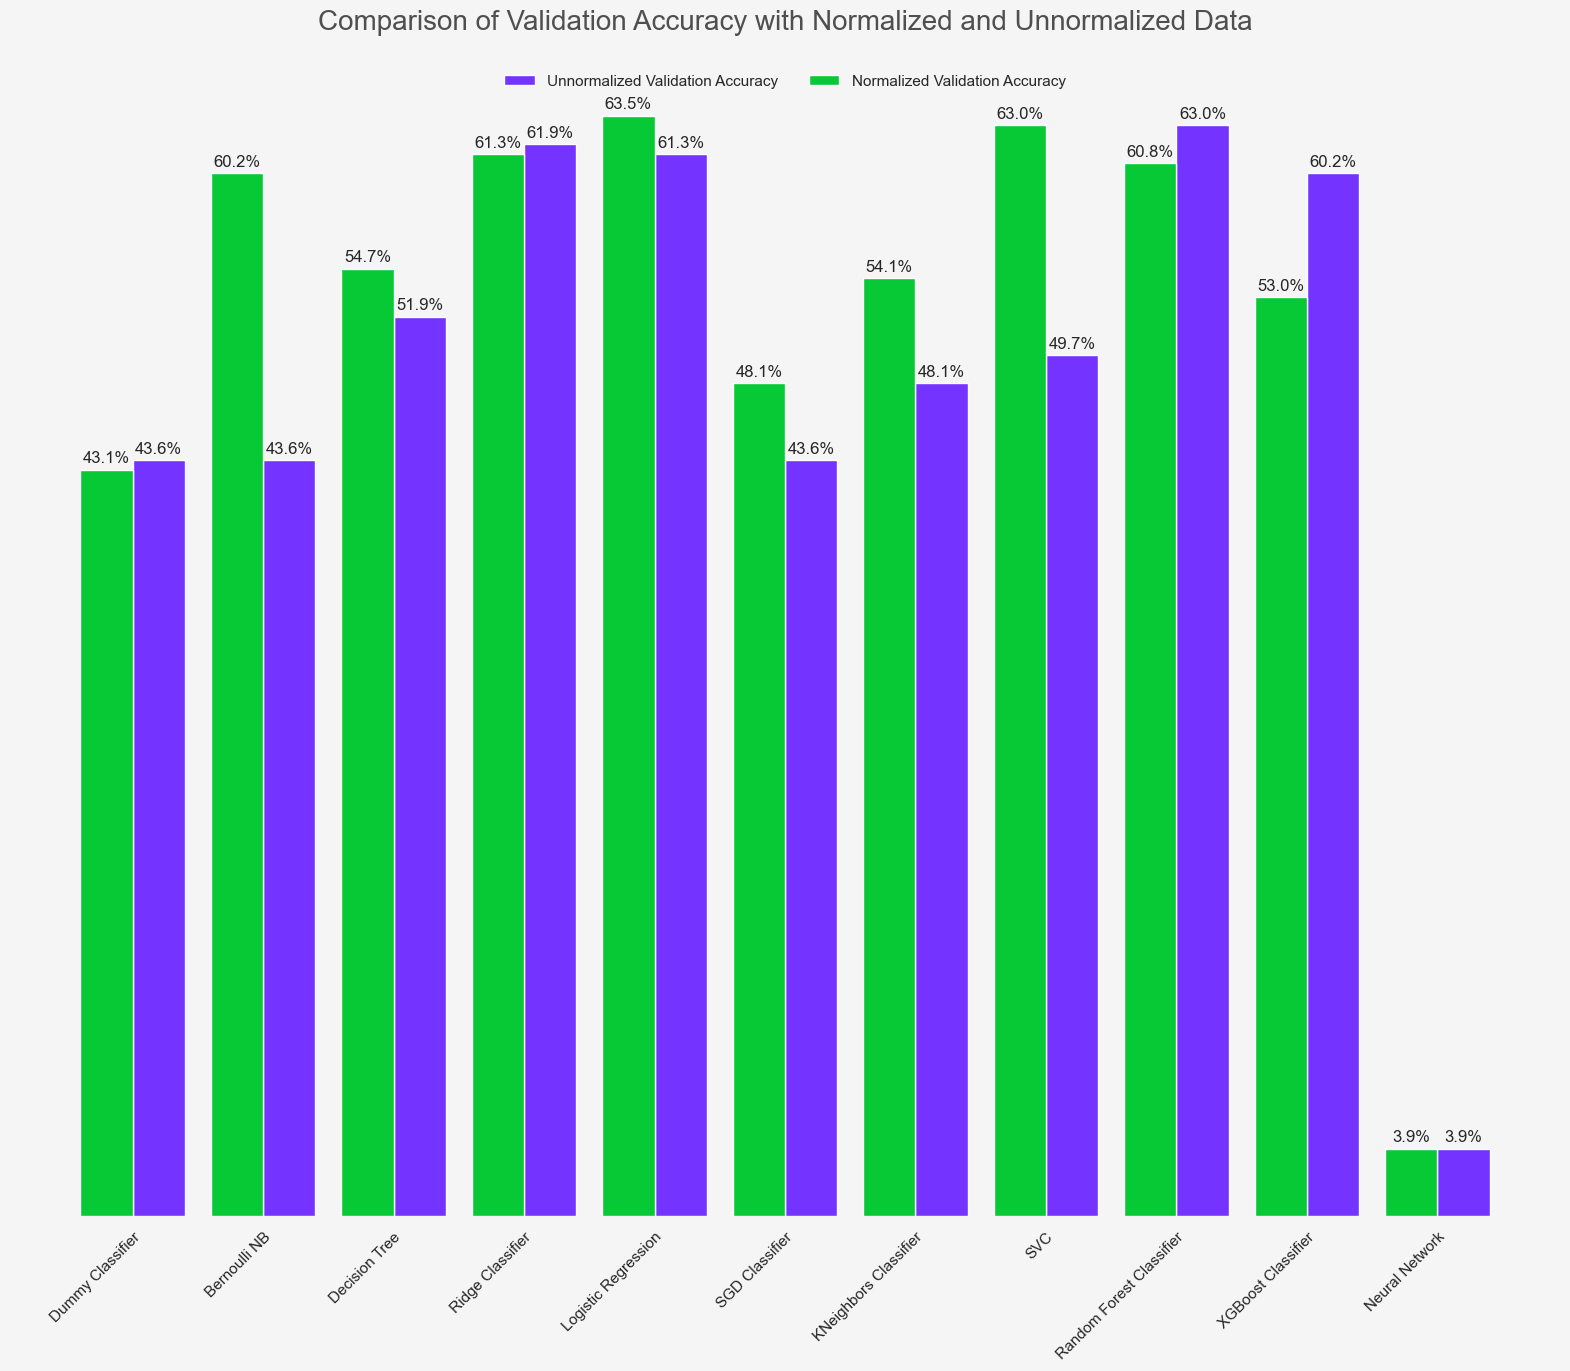

In [27]:
fig = plt.figure(figsize=(20,15))   # changes the size of the image
fig.patch.set_facecolor('whitesmoke')  # set the background color of the plot to match the seaborn theme

ax = plt.gca()
width = 0.40

rects1 = ax.bar(df_acc.index, df_acc['Acc Validation'], width,align='edge', color = '#7433FF', label='Unnormalized Validation Accuracy')
rects2 = ax.bar(df_acc_norm.index, df_acc_norm['Acc Validation'], -width, align='edge', color = '#06C935', label='Normalized Validation Accuracy')

for r1, r2 in zip(rects1.patches, rects2.patches):
    h1 = r1.get_height()
    h2 = r2.get_height()

    percent1 = h1*100
    percent2 = h2*100

    ax.annotate('{:.1f}%'.format(percent1),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('{:.1f}%'.format(percent2),
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Rotate the X labels (models' names)

plt.box(False)  # disable the box around the plot
ax.grid(False)  # disable the grid
ax.set_yticks([])   # disable the y ticks
plt.xticks(rotation=45, rotation_mode="anchor", ha='right')

# creating a title
plt.title('Comparison of Validation Accuracy with Normalized and Unnormalized Data', size=20, alpha=0.8, y=1.02)

# add the legend (to display the horizontal lines' labels)
plt.legend(frameon=False, loc='upper center', ncol=2)

# saves the plot
plt.savefig("comparison-normalized-unnormalized.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();